# **COVID 19 Diagnosis System by X-ray**

### **Importing the Libraries**

In [59]:
import tensorflow as tf
import pandas as pd
import random
from imutils import paths
from tensorflow.keras.applications import VGG16, VGG19
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import cv2
import os

print('all library imported')

all library imported


### **Data Exploration**

In [61]:
#Loading the data about data
print ('Loading data about image')
pd.set_option('display.max_rows', 500)
covid_data = pd.read_csv('metadata.csv')
covid_data.head()

Loading data about image


,Patientid,offset,sex,age,finding,survival,view,modality,date,location,filename,doi,url,license,clinical notes,other notes,Unnamed: 16
0,2,0.0,M,65.0,COVID-19,Y,PA,X-ray,2020,NaN,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,NaN,NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,PA,X-ray,2020,NaN,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,NaN,NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,PA,X-ray,2020,NaN,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,NaN,NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,PA,X-ray,2020,NaN,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,NaN,NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,PA,X-ray,2020,"Changhua Christian Hospital, Changhua City, Ta...",nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [62]:
covid_data[['finding','view','modality','survival','age']]

,finding,view,modality,survival,age
0,COVID-19,PA,X-ray,Y,65.0
1,COVID-19,PA,X-ray,Y,65.0
2,COVID-19,PA,X-ray,Y,65.0
3,COVID-19,PA,X-ray,Y,65.0
4,COVID-19,PA,X-ray,NaN,52.0
5,COVID-19,PA,X-ray,NaN,52.0
6,ARDS,PA,X-ray,NaN,NaN
7,COVID-19,PA,X-ray,NaN,NaN
8,COVID-19,PA,X-ray,NaN,NaN
9,SARS,PA,X-ray,N,74.0


### **Loading the image data**

COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
COVID
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
Number of training images:  138
Number of training images:  138
['COVID' 'COVID' 'COVID' 'COVID' 'COVID

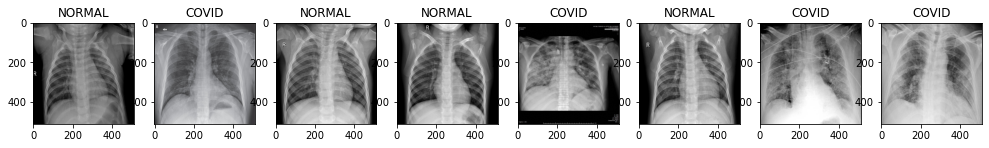

In [63]:
#List of files

path_list = list(paths.list_images('Dataset'))

X = []
Y = []


for path in path_list:
    # Set Class label
    y = path.split(os.path.sep)[-2]
    print(y)
    # Grayscale the image and reshape
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (512, 512))

    # update the data and labels lists, respectively
    X.append(image)
    Y.append(y)

# Normalize images

X = np.array(X) / 255.0
Y = np.array(Y)

print('Number of training images: ', len(X))
print('Number of training images: ', len(Y))
print(Y)

# Plot example patient scan

W = 8
L = 1
fig, axes = plt.subplots(L, W, figsize = (17,17))
axes = axes.ravel() 
n = 138

for i in np.arange(0, W * L):
    index = np.random.randint(0, n)    
    axes[i].imshow( X[index] )
    axes[i].set_title(Y[index])

#one-hot encoding on the labels
lb = LabelBinarizer()
Y = lb.fit_transform(Y)
Y = tf.keras.utils.to_categorical(Y)

### **Splitting the data**

In [64]:
# split training and test data

(X_train, x_test, Y_train, y_test) = train_test_split(X, Y,
	test_size=0.20, stratify=Y, random_state=2019)

(x_train, x_valid, y_train, y_valid) = train_test_split(X_train, Y_train,
	test_size=0.20, stratify=Y_train, random_state=2019)


### **Data Augmentation**

In [65]:
Datagen= tf.keras.preprocessing.image.ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,
                            rotation_range=20,width_shift_range=0.2,
                            height_shift_range=0.2,horizontal_flip=True)

### **CNN Architecture**

In [66]:
def Covid_model():
    input_img = tf.keras.layers.Input(shape=(512, 512, 3))
    baseModel = VGG16(weights="imagenet", include_top=False,
	  input_tensor=tf.keras.layers.Input(shape=(512, 512, 3)))

    # Make all pre-trained layers from VGG19 non-trainable 
    for layer in baseModel.layers[:-3]:
        layer.trainable = False
    x = baseModel.output
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.BatchNormalization(axis=-1)(x)
    x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
    x = tf.keras.layers.Dropout(0.25)(x)

    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.BatchNormalization(axis=-1)(x)

    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.BatchNormalization(axis=-1)(x)
    x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
    x = tf.keras.layers.Dropout(0.25)(x)
    

    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.BatchNormalization(axis=-1)(x)

    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.BatchNormalization(axis=-1)(x)

    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.BatchNormalization(axis=-1)(x)
    x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
    x = tf.keras.layers.Dropout(0.25)(x)

    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.5)(x)

    x = tf.keras.layers.Dense(2, activation='softmax')(x)
  
    
    covid_model = tf.keras.models.Model(baseModel.input, x)
    adagrad=tf.keras.optimizers.Adagrad(lr=0.001)
    covid_model.compile(optimizer=adagrad, loss='binary_crossentropy',metrics=["accuracy"])
    return covid_model



In [67]:
 model = Covid_model()
 model.summary()
 early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)
covid= model.fit_generator(Datagen.flow(x_train, y_train, batch_size=8),
                      steps_per_epoch=len(x_train) / 8,
                      validation_data=(x_valid, y_valid), epochs=5,callbacks = [early_stopping])

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)     0  

C:\Users\Karan\AppData\Roaming\Python\Python37\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Karan\AppData\Roaming\Python\Python37\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


  ...
    to  
  ['...']
Train for 11.0 steps, validate on 22 samples
Epoch 1/5


C:\Users\Karan\AppData\Roaming\Python\Python37\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Karan\AppData\Roaming\Python\Python37\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


11/11 [==============================] - 37s 3s/step - loss: 1.1683 - accuracy: 0.4886 - val_loss: 0.6645 - val_accuracy: 0.5000
Epoch 2/5
11/11 [==============================] - 24s 2s/step - loss: 0.8237 - accuracy: 0.6364 - val_loss: 0.7108 - val_accuracy: 0.5000
Epoch 3/5
11/11 [==============================] - 24s 2s/step - loss: 0.7577 - accuracy: 0.7273 - val_loss: 0.8313 - val_accuracy: 0.5000
Epoch 4/5
11/11 [==============================] - 20s 2s/step - loss: 0.5826 - accuracy: 0.7727 - val_loss: 0.7912 - val_accuracy: 0.5000
Epoch 5/5
11/11 [==============================] - 19s 2s/step - loss: 0.5700 - accuracy: 0.7500 - val_loss: 0.8322 - val_accuracy: 0.5000


### **Performance Evaluation**

loss :  0.7949421107769012
accuracy :  0.5
              precision    recall  f1-score   support

       COVID       1.00      0.50      0.67        28
      NORMAL       0.00      0.00      0.00         0

    accuracy                           0.50        28
   macro avg       0.50      0.25      0.33        28
weighted avg       1.00      0.50      0.67        28

accuracy: 0.5000
sensitivity: 0.5000
specificity: nan


c:\users\karan\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\karan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in longlong_scalars


Text(0.5, 15.0, 'Predicted label')

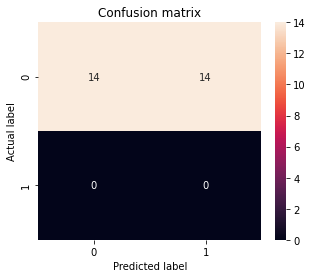

In [68]:
y_pred = model.predict(x_test, batch_size=8)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


predicted_metrics = model.evaluate(x_test, y_test,
                                  batch_size=8, verbose=0)

for name, value in zip(model.metrics_names, predicted_metrics):
  print(name, ': ', value)
print(classification_report(y_pred, y_true,
	target_names=lb.classes_))
cm = confusion_matrix(y_pred, y_true)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    
print("accuracy: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [69]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import sys
from PIL import Image

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.


successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

img = cv2.imread('random_COVID19.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (512, 512))
x = img_to_array(img)  # Numpy array with shape (512, 512, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 512, 512, 3)

# Rescale by 1/255 
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.

successive_feature_maps = model.predict(x)
print(successive_feature_maps)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4: 
    
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

[[0.82811075 0.17188919]]
